# Objective :

predict the customers who are likely to churn and develop appropriate modalities for retention.
Also engage customer on an ongoing basis and prevent churn by designing new plans and offering
freebees, discounts.

###  Step 1: Data Reading and Pre-processing 

In [1]:
# Get-Set Working directory 

import os
os.getcwd()
os.chdir('C:\\Users\\Kaustubh Coolkarni\\Desktop\\INSOFE Docs\\MiTH_67\\Input_Files_For_Student')

In [120]:
import mlxtend
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.data import iris_data
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as sps
import re
%matplotlib inline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


In [3]:
import pandas_profiling
from sklearn.preprocessing import StandardScaler
import datetime as date,time
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
import graphviz

In [4]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [5]:
bank_churn_train = pd.read_excel ('Train.xlsx')
bank_churn_test = pd.read_excel('Test.xlsx')


In [6]:
bank_churn_test_sub = pd.read_excel('Test.xlsx')

In [7]:
bank_churn_test.shape


(1840, 20)

In [13]:
#pandas_profiling.ProfileReport(bank_churn_train)

 #### Step 1.1 : EDA 

In [8]:
bank_churn_train.head()

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,...,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
0,C5814651,Name_5814651,1980,5,12,2014,11,28,Male,Location11,...,divorced,management,no,716,0.00,2,1,0,189678.70,No
1,C6465787,Name_6465787,1986,12,28,2011,8,17,Female,Location13,...,divorced,admin.,no,568,169399.60,1,1,0,61936.22,No
2,C3824349,Name_3824349,1999,11,23,2013,12,9,Male,Location13,...,married,unknown,unknown,739,89750.21,1,1,0,193008.52,No
3,C8431888,Name_8431888,1969,4,6,2015,12,12,Female,Location11,...,married,admin.,yes,678,204510.94,1,0,1,738.88,Yes
4,C2944860,Name_2944860,1993,6,15,2012,10,10,Male,Location13,...,single,management,no,670,0.00,2,1,1,78358.94,No


In [12]:
bank_churn_train.describe()

,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary
count,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000
mean,1979.058832,6.540897,14.607201,2012.984783,6.477174,14.505571,650.648777,76601.068011,1.524592,0.704212,0.510462,99967.894062
std,10.464673,3.432135,8.068158,2.898385,3.433252,8.020220,96.769231,62442.214871,0.577415,0.456427,0.499924,57342.390262
min,1926.000000,1.000000,1.000000,2008.000000,1.000000,1.000000,350.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,1974.000000,4.000000,8.000000,2010.000000,4.000000,8.000000,584.000000,0.000000,1.000000,0.000000,0.000000,51361.780000
50%,1981.000000,7.000000,15.000000,2013.000000,6.000000,15.000000,652.000000,96913.725000,1.000000,1.000000,1.000000,99446.940000
75%,1986.000000,10.000000,22.000000,2015.250000,9.000000,21.000000,718.000000,127660.767500,2.000000,1.000000,1.000000,149068.075000
max,2000.000000,12.000000,28.000000,2018.000000,12.000000,28.000000,850.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


In [9]:
bank_churn_train.dtypes

CustomerID               object
CustomerName             object
yearofBirth               int64
monthofBirth              int64
dayofBirth                int64
yearofEntry               int64
monthofEntry              int64
dayofEntry                int64
Gender                   object
Location                 object
Education                object
MaritalStatus            object
Occupation               object
Ownhouse                 object
CreditScore               int64
AccountBalance          float64
NumberOfProducts          int64
IsCreditCardCustomer      int64
ActiveMember              int64
Salary                  float64
Churn                    object
dtype: object

In [10]:
bank_churn_train_dummy.shape
#bank_churn_train.shape

NameError: name 'bank_churn_train_dummy' is not defined

In [10]:
bank_churn_train_dummy = bank_churn_train.iloc[:, :-1]

### Check train test data consistancy 

In [11]:
def compare_train_test(bank_churn_train_dummy, bank_churn_test):
    train_levels = bank_churn_train_dummy.apply(lambda x: set(x.unique()),axis=0)
    test_levels = bank_churn_test.apply(lambda x: set(x.unique()),axis=0)
    extra = []
    missing = []
    for x1,x2 in zip(train_levels, test_levels):
        missing.append(x1-x2)
        extra.append(x2-x1)
    
    return pd.DataFrame({"Train Data Type":bank_churn_train_dummy.dtypes, "Test Data Type":bank_churn_test.dtypes,
                         "Train #Levels":bank_churn_train_dummy.apply(lambda x: x.unique().shape[0],axis=0), "Test #Levels":bank_churn_test.apply(lambda x: x.unique().shape[0],axis=0),
                         "Test Missing":missing, "Test Extra":extra})
compare_train_test(bank_churn_train_dummy, bank_churn_test)

,Train Data Type,Test Data Type,Train #Levels,Test #Levels,Test Missing,Test Extra
CustomerID,object,object,7360,1840,"{C3460615, C3009032, C3018545, C7865308, C7062...","{C3737689, C4776104, C4247085, C2075853, C3366..."
CustomerName,object,object,7360,1840,"{Name_5965376, Name_7839808, Name_6021505, Nam...","{Name_5481509, Name_8261195, Name_5324509, Nam..."
yearofBirth,int64,int64,70,62,"{1926, 1930, 1933, 1934, 1935, 1936, 1938, 1945}",{}
monthofBirth,int64,int64,12,12,{},{}
dayofBirth,int64,int64,28,28,{},{}
yearofEntry,int64,int64,11,11,{},{}
monthofEntry,int64,int64,12,12,{},{}
dayofEntry,int64,int64,28,28,{},{}
Gender,object,object,2,2,{},{}
Location,object,object,3,3,{},{}


### Convert target column (Churn) to 1 and 0

In [12]:
bank_churn_train['Churn']=bank_churn_train['Churn'].map({'Yes':1, 'No':0})

### Feature Engineering

In [13]:
bank_churn_train['Age'] = 2019 - bank_churn_train['yearofBirth']
bank_churn_train['Tenure'] = 2019 - bank_churn_train['yearofEntry']





In [14]:
bank_churn_test['Age'] = 2019 - bank_churn_test['yearofBirth']
bank_churn_test['Tenure'] = 2019 - bank_churn_test['yearofEntry']

In [15]:
bank_churn_train['ExpenditureRatio'] = bank_churn_train.AccountBalance/( bank_churn_train.Salary)
bank_churn_train['TenureRatio'] = bank_churn_train.Tenure/(bank_churn_train.Age)

In [16]:
bank_churn_test['ExpenditureRatio'] = bank_churn_test.AccountBalance/( bank_churn_train.Salary)
bank_churn_test['TenureRatio'] = bank_churn_test.Tenure/(bank_churn_train.Age)

### Drop 

In [17]:
bank_churn_train.head()

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,...,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,Age,Tenure,ExpenditureRatio,TenureRatio
0,C5814651,Name_5814651,1980,5,12,2014,11,28,Male,Location11,...,0.00,2,1,0,189678.70,0,39,5,0.000000,0.128205
1,C6465787,Name_6465787,1986,12,28,2011,8,17,Female,Location13,...,169399.60,1,1,0,61936.22,0,33,8,2.735065,0.242424
2,C3824349,Name_3824349,1999,11,23,2013,12,9,Male,Location13,...,89750.21,1,1,0,193008.52,0,20,6,0.465006,0.300000
3,C8431888,Name_8431888,1969,4,6,2015,12,12,Female,Location11,...,204510.94,1,0,1,738.88,1,50,4,276.785053,0.080000
4,C2944860,Name_2944860,1993,6,15,2012,10,10,Male,Location13,...,0.00,2,1,1,78358.94,0,26,7,0.000000,0.269231


In [18]:
# # Identify the columns need to be dropped 
drop_cols = ['CustomerID','CustomerName','monthofBirth','monthofEntry','dayofEntry','dayofBirth','yearofBirth','yearofEntry']
# Drop
bank_churn_train.drop(drop_cols, axis = 1, inplace = True)



In [19]:
bank_churn_test.drop(drop_cols, axis = 1, inplace = True)

#### Decide Num and Cat data columns and convert datatypes

In [20]:
bank_churn_train.describe()

,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,Age,Tenure,ExpenditureRatio,TenureRatio
count,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000
mean,650.648777,76601.068011,1.524592,0.704212,0.510462,99967.894062,0.202717,39.941168,6.015217,4.285643,0.160504
std,96.769231,62442.214871,0.577415,0.456427,0.499924,57342.390262,0.402051,10.464673,2.898385,125.870516,0.089302
min,350.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,19.000000,1.000000,0.000000,0.012500
25%,584.000000,0.000000,1.000000,0.000000,0.000000,51361.780000,0.000000,33.000000,3.750000,0.000000,0.088235
50%,652.000000,96913.725000,1.000000,1.000000,1.000000,99446.940000,0.000000,38.000000,6.000000,0.749151,0.151515
75%,718.000000,127660.767500,2.000000,1.000000,1.000000,149068.075000,0.000000,45.000000,9.000000,1.522935,0.222222
max,850.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,93.000000,11.000000,10614.655440,0.578947


In [21]:
bank_churn_test.isnull().sum()

Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             0
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
Age                     0
Tenure                  0
ExpenditureRatio        0
TenureRatio             0
dtype: int64

In [22]:
bank_churn_train.head()

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,Age,Tenure,ExpenditureRatio,TenureRatio
0,Male,Location11,primary,divorced,management,no,716,0.00,2,1,0,189678.70,0,39,5,0.000000,0.128205
1,Female,Location13,primary,divorced,admin.,no,568,169399.60,1,1,0,61936.22,0,33,8,2.735065,0.242424
2,Male,Location13,secondary,married,unknown,unknown,739,89750.21,1,1,0,193008.52,0,20,6,0.465006,0.300000
3,Female,Location11,tertiary,married,admin.,yes,678,204510.94,1,0,1,738.88,1,50,4,276.785053,0.080000
4,Male,Location13,tertiary,single,management,no,670,0.00,2,1,1,78358.94,0,26,7,0.000000,0.269231


In [23]:
bank_churn_train.columns

Index(['Gender', 'Location', 'Education', 'MaritalStatus', 'Occupation',
       'Ownhouse', 'CreditScore', 'AccountBalance', 'NumberOfProducts',
       'IsCreditCardCustomer', 'ActiveMember', 'Salary', 'Churn', 'Age',
       'Tenure', 'ExpenditureRatio', 'TenureRatio'],
      dtype='object')

In [24]:
cat_cols = ['Gender','Location', 'Education', 'MaritalStatus', 'Occupation',
       'Ownhouse','IsCreditCardCustomer', 'ActiveMember','Churn']

test_cat_cols = ['Gender','Location', 'Education', 'MaritalStatus', 'Occupation',
       'Ownhouse','IsCreditCardCustomer', 'ActiveMember']

num_cols = bank_churn_train.columns.difference(cat_cols)

In [25]:
bank_churn_train[cat_cols] = bank_churn_train[cat_cols].apply(lambda x: x.astype('category'))
bank_churn_train[num_cols] = bank_churn_train[num_cols].apply(lambda x: x.astype('float'))

In [26]:
bank_churn_test[test_cat_cols] = bank_churn_train[test_cat_cols].apply(lambda x: x.astype('category'))
bank_churn_test[num_cols] = bank_churn_train[num_cols].apply(lambda x: x.astype('float'))

In [27]:
bank_churn_train.columns

Index(['Gender', 'Location', 'Education', 'MaritalStatus', 'Occupation',
       'Ownhouse', 'CreditScore', 'AccountBalance', 'NumberOfProducts',
       'IsCreditCardCustomer', 'ActiveMember', 'Salary', 'Churn', 'Age',
       'Tenure', 'ExpenditureRatio', 'TenureRatio'],
      dtype='object')

#### Place target column at end

In [28]:
bank_churn_train = bank_churn_train[['Gender', 'Location', 'Education', 'MaritalStatus', 'Occupation',
       'Ownhouse', 'CreditScore', 'AccountBalance', 'NumberOfProducts',
       'IsCreditCardCustomer', 'ActiveMember', 'Salary', 'Age',
       'Tenure','ExpenditureRatio', 'TenureRatio', 'Churn']]

In [29]:
bank_churn_train.head()

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Age,Tenure,ExpenditureRatio,TenureRatio,Churn
0,Male,Location11,primary,divorced,management,no,716.0,0.00,2.0,1,0,189678.70,39.0,5.0,0.000000,0.128205,0
1,Female,Location13,primary,divorced,admin.,no,568.0,169399.60,1.0,1,0,61936.22,33.0,8.0,2.735065,0.242424,0
2,Male,Location13,secondary,married,unknown,unknown,739.0,89750.21,1.0,1,0,193008.52,20.0,6.0,0.465006,0.300000,0
3,Female,Location11,tertiary,married,admin.,yes,678.0,204510.94,1.0,0,1,738.88,50.0,4.0,276.785053,0.080000,1
4,Male,Location13,tertiary,single,management,no,670.0,0.00,2.0,1,1,78358.94,26.0,7.0,0.000000,0.269231,0


### Step 3 :  Univariate and Bivariate Visualizations

#### Correlation plot

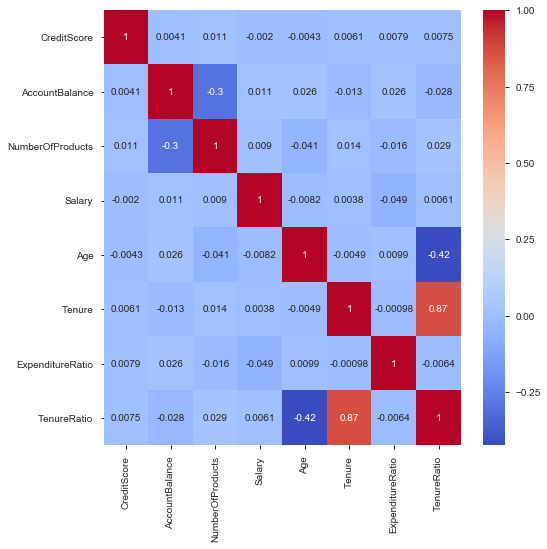

In [30]:
plt.figure(figsize=(8,8))
sns.heatmap(bank_churn_train.corr(),cmap='coolwarm',annot = True)
plt.show();

In [ ]:

# box plots for distribution

In [68]:
#bank_churn_train.Churn.value_counts()

0    5868
1    1492
Name: Churn, dtype: int64

RecursionError: maximum recursion depth exceeded while calling a Python object

Exception ignored in: 'pandas._libs.lib.c_is_list_like'
Traceback (most recent call last):
  File "C:\Users\Kaustubh Coolkarni\Anac3\lib\abc.py", line 182, in __instancecheck__
    if subclass in cls._abc_cache:
RecursionError: maximum recursion depth exceeded while calling a Python object


Retained: 5868
Churned: 1492


RecursionError: maximum recursion depth exceeded while calling a Python object

Exception ignored in: 'pandas._libs.lib.c_is_list_like'
Traceback (most recent call last):
  File "C:\Users\Kaustubh Coolkarni\Anac3\lib\abc.py", line 182, in __instancecheck__
    if subclass in cls._abc_cache:
RecursionError: maximum recursion depth exceeded while calling a Python object


Proportion: 3.93 : 1


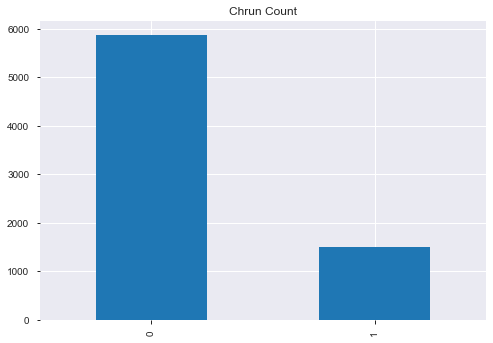

In [31]:
target_count = bank_churn_train.Churn.value_counts()
print('Retained:', target_count[0])
print('Churned:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Chrun Count');

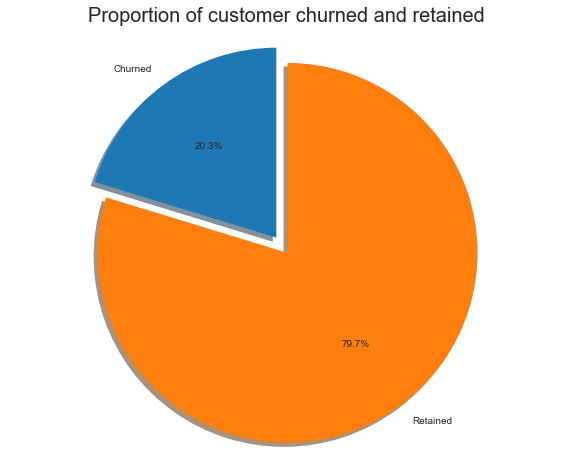

In [30]:
labels = 'Churned', 'Retained'
sizes = [bank_churn_train.Churn[bank_churn_train['Churn']==1].count(), bank_churn_train.Churn[bank_churn_train['Churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [ ]:
sns.countplot(x=, data=train_data)

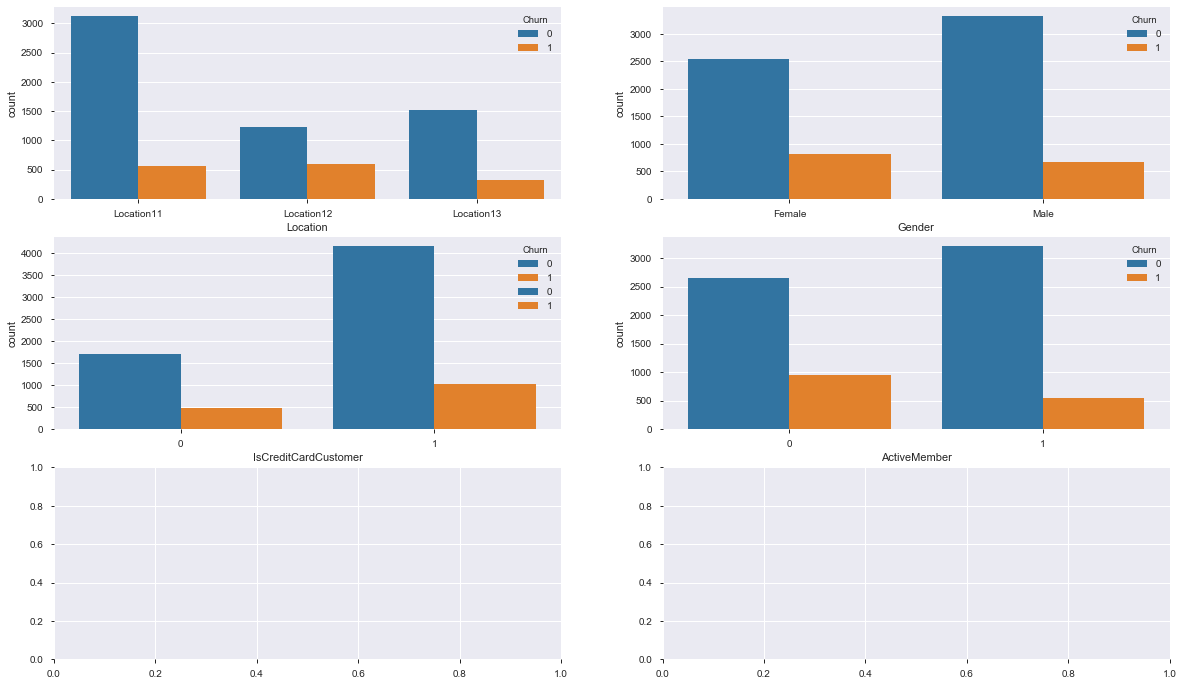

In [37]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.countplot(x='Location', hue = 'Churn',data = bank_churn_train, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Churn',data = bank_churn_train, ax=axarr[0][1])
    sns.countplot(x='Age', hue = 'Churn',data = bank_churn_train, ax=axarr[1][0])
    sns.countplot(x='ActiveMember', hue = 'Churn',data = bank_churn_train, ax=axarr[1][1])
    sns.countplot(x='IsCreditCardCustomer', hue = 'Churn',data = bank_churn_train, ax=axarr[1][0])
    #sns.countplot(x='ActiveMember', hue = 'Churn',data = bank_churn_train, ax=axarr[1][1])

In [89]:
bank_churn_train.head()

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Age,Tenure,ExpenditureRatio,Churn
0,Male,Location11,primary,divorced,management,no,716.0,0.00,2.0,1,0,189678.70,39.0,5.0,0.000000,0
1,Female,Location13,primary,divorced,admin.,no,568.0,169399.60,1.0,1,0,61936.22,33.0,8.0,2.735065,0
2,Male,Location13,secondary,married,unknown,unknown,739.0,89750.21,1.0,1,0,193008.52,20.0,6.0,0.465006,0
3,Female,Location11,tertiary,married,admin.,yes,678.0,204510.94,1.0,0,1,738.88,50.0,4.0,276.785053,1
4,Male,Location13,tertiary,single,management,no,670.0,0.00,2.0,1,1,78358.94,26.0,7.0,0.000000,0


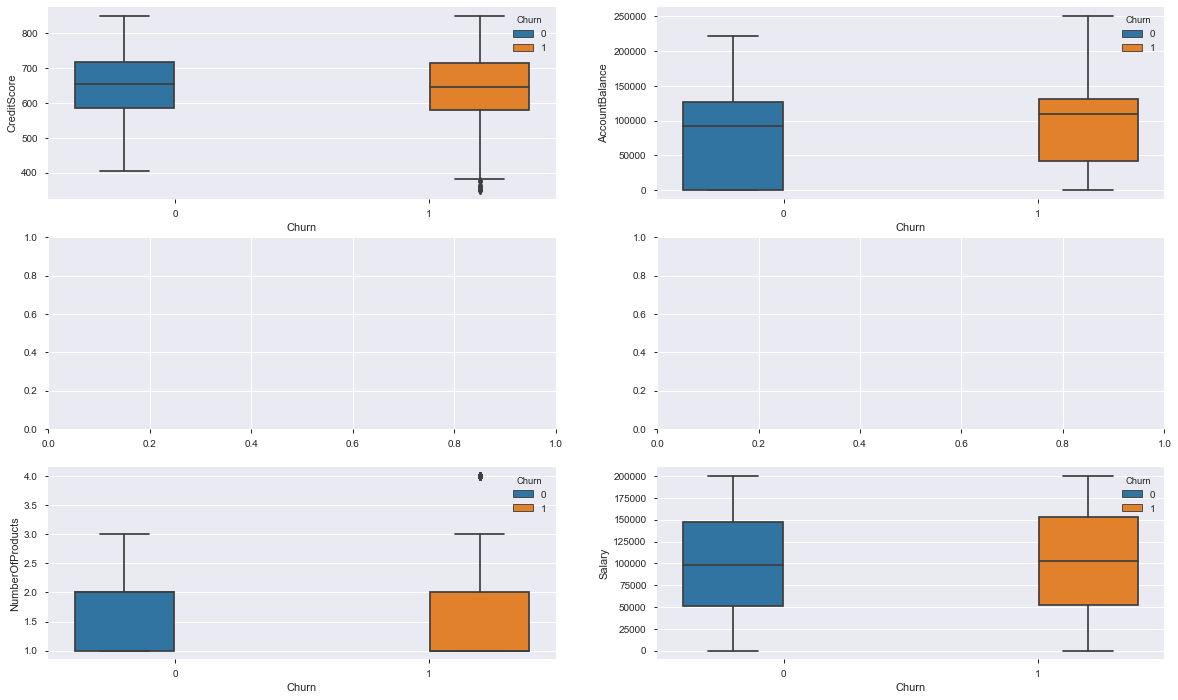

In [38]:
    # Relations based on the continuous data attributes
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='CreditScore',x = 'Churn', hue = 'Churn',data = bank_churn_train, ax=axarr[0][0])
    sns.boxplot(y='AccountBalance',x = 'Churn', hue = 'Churn',data = bank_churn_train , ax=axarr[0][1])
    sns.boxplot(y='NumberOfProducts',x = 'Churn', hue = 'Churn',data = bank_churn_train, ax=axarr[2][0])
    sns.boxplot(y='Salary',x = 'Churn', hue = 'Churn',data = bank_churn_train, ax=axarr[2][1])


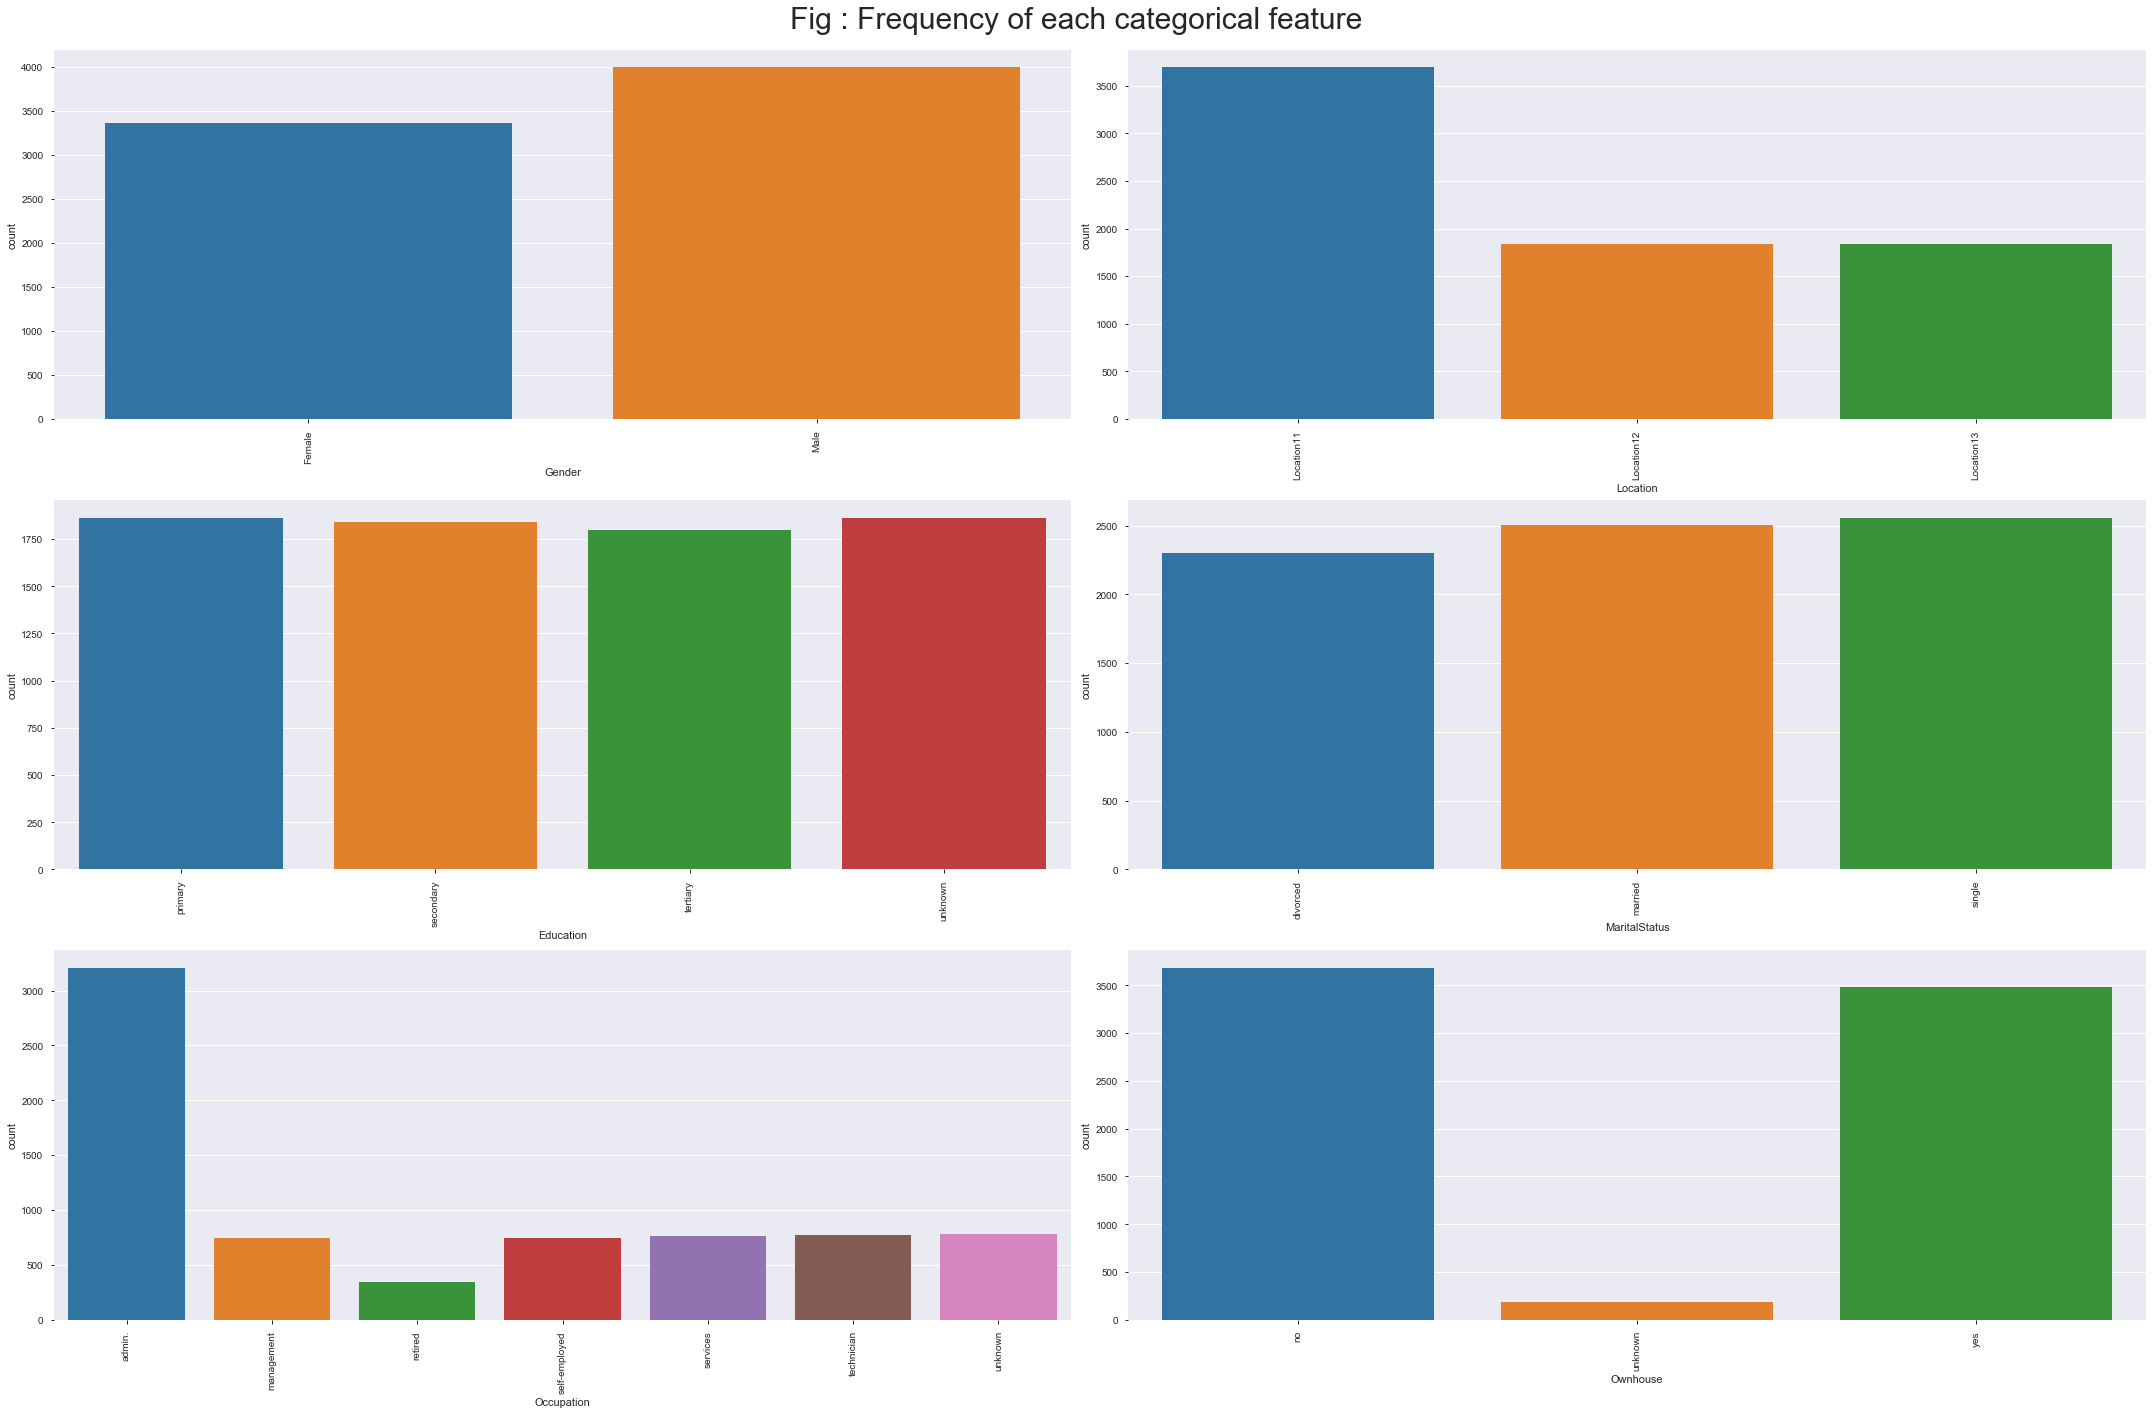

In [39]:
#Show frequency of each categorical column
fig, ax = plt.subplots(3,2, figsize=(30,20))
for variable, subplot in zip(cat_cols, ax.flatten()):
    sns.countplot(bank_churn_train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
fig.suptitle('Fig : Frequency of each categorical feature', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

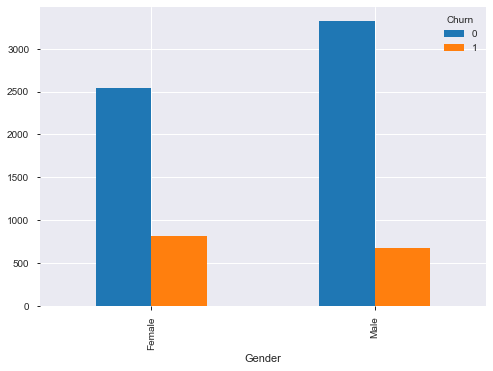

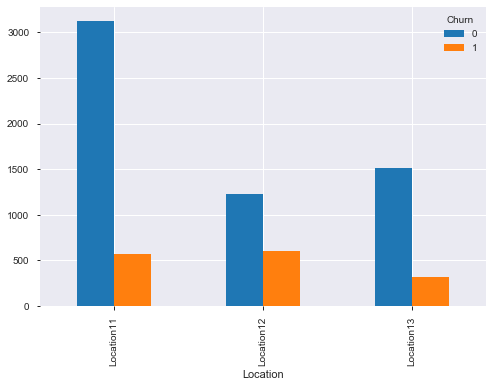

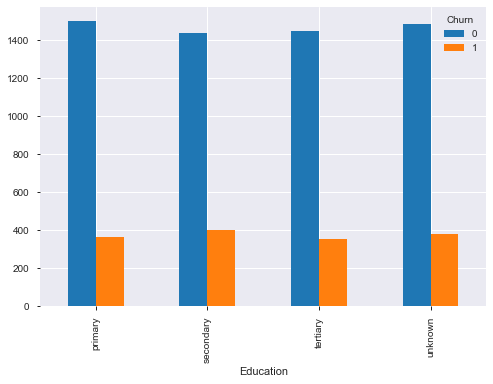

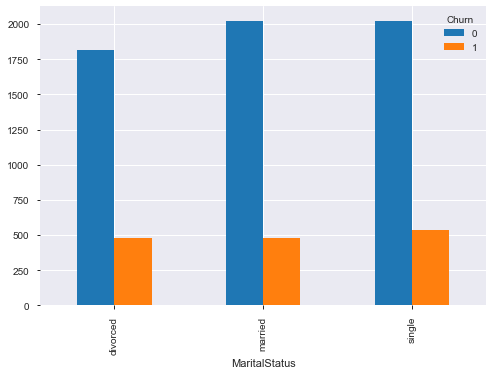

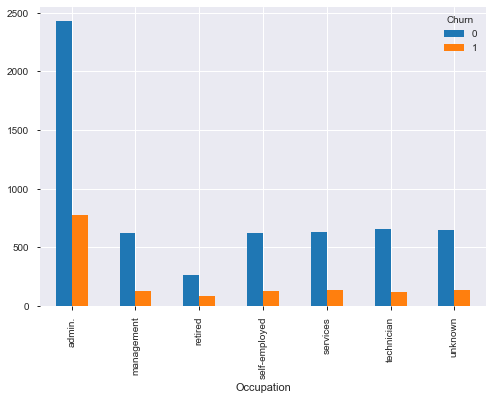

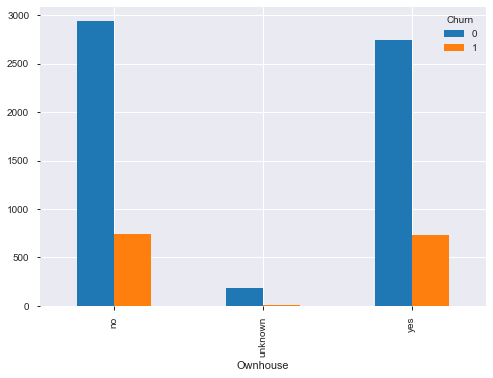

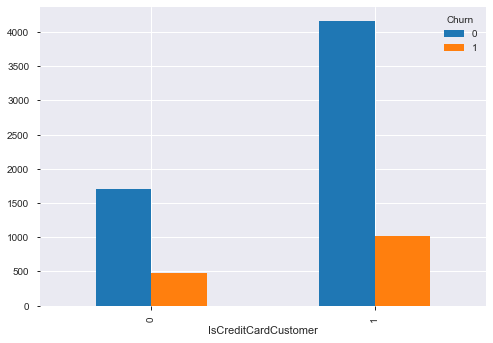

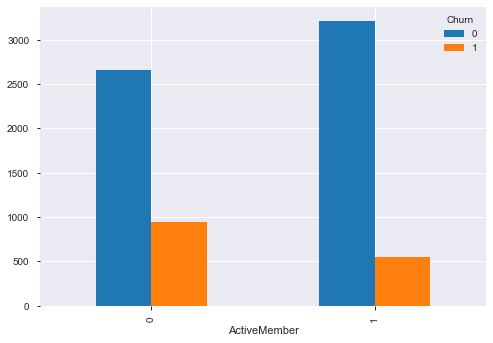

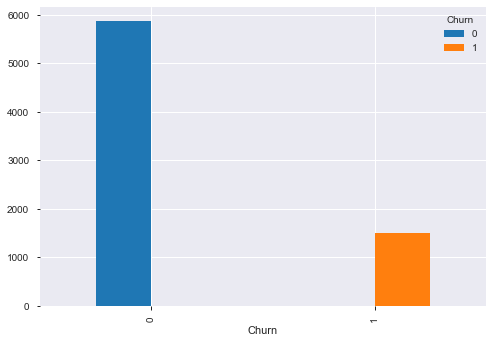

In [97]:
#Comparing each categorical column with status
for i,j in enumerate(cat_cols):
    if(j!="status"):
        cat_plot = pd.crosstab(bank_churn_train[j],bank_churn_train["Churn"])
        cat_plot.plot(kind='bar')
        plt.xticks(rotation=90)
    plt.show()

### Step 4 : Feature Engineering (Add new / remove Unecessary)

### Step 5 : Train/Test  Split

In [31]:
trainx,vldx,trainy,vldy = train_test_split(bank_churn_train.iloc[:,:-1],bank_churn_train.iloc[:,-1],test_size=0.3,random_state=1)
print(bank_churn_train.shape)
print(trainx.shape)
print(vldx.shape)

(7360, 17)
(5152, 16)
(2208, 16)


In [33]:
trainx.head()

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Age,Tenure
4844,Female,Location11,primary,divorced,admin.,no,610.0,81905.95,1.0,1,1,61623.19,36.0,8.0
6660,Female,Location13,primary,single,admin.,yes,692.0,0.00,2.0,1,0,150802.41,48.0,4.0
1893,Male,Location11,secondary,married,retired,yes,748.0,0.00,1.0,1,1,163331.65,67.0,9.0
2053,Male,Location11,unknown,married,retired,yes,753.0,121513.31,1.0,0,1,195563.99,93.0,4.0
2978,Male,Location11,tertiary,divorced,unknown,no,697.0,141223.68,2.0,1,0,90591.15,28.0,9.0


### Step 6 : Pre-Processing steps on train data

In [32]:
cat_col = ['Gender','Location', 'Education', 'MaritalStatus', 'Occupation',
       'Ownhouse','IsCreditCardCustomer', 'ActiveMember']

num_col = ['AccountBalance', 'Age', 'CreditScore', 'NumberOfProducts',
       'Salary', 'Tenure','ExpenditureRatio', 'TenureRatio']

#### Step 6.1 : Differenciate Num and categorical data

In [33]:
train_num_data = trainx.loc[:,num_col]
train_cat_data = trainx.loc[:,cat_col]

#### Step 6.2 : Standardize

In [35]:
standardizer = StandardScaler()
standardizer.fit(train_num_data)
train_num_data = pd.DataFrame(standardizer.transform(train_num_data),columns=num_col)

In [36]:
train_num_data.reset_index(drop=True, inplace=True)
train_cat_data.reset_index(drop=True, inplace=True)

#### Step 6.3 : Concat Num and Cat columns

In [37]:
trainx = pd.concat([train_num_data,train_cat_data],axis=1)

In [38]:
trainx.head()

,AccountBalance,Age,CreditScore,NumberOfProducts,Salary,Tenure,ExpenditureRatio,TenureRatio,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,IsCreditCardCustomer,ActiveMember
0,0.097583,-0.370663,-0.436011,-0.895985,-0.662168,0.690172,-0.023309,0.688116,Female,Location11,primary,divorced,admin.,no,1,1
1,-1.217800,0.773815,0.412390,0.827732,0.893026,-0.690306,-0.032228,-0.859047,Female,Location13,primary,single,admin.,yes,1,0
2,-1.217800,2.585904,0.991786,-0.895985,1.111523,1.035292,-0.032228,-0.290984,Male,Location11,secondary,married,retired,yes,1,1
3,0.733664,5.065606,1.043517,-0.895985,1.673622,-0.690306,-0.028059,-1.308223,Male,Location11,unknown,married,retired,yes,0,1
4,1.050206,-1.133648,0.464122,0.827732,-0.156997,1.035292,-0.021767,1.793232,Male,Location11,tertiary,divorced,unknown,no,1,0


#### Step 6.4 : Dummify

In [39]:
trainx=pd.get_dummies(trainx,columns=cat_col.extend(['cat_cc']))
trainx.head()

,AccountBalance,Age,CreditScore,NumberOfProducts,Salary,Tenure,ExpenditureRatio,TenureRatio,Gender_Female,Gender_Male,...,Occupation_services,Occupation_technician,Occupation_unknown,Ownhouse_no,Ownhouse_unknown,Ownhouse_yes,IsCreditCardCustomer_0,IsCreditCardCustomer_1,ActiveMember_0,ActiveMember_1
0,0.097583,-0.370663,-0.436011,-0.895985,-0.662168,0.690172,-0.023309,0.688116,1,0,...,0,0,0,1,0,0,0,1,0,1
1,-1.217800,0.773815,0.412390,0.827732,0.893026,-0.690306,-0.032228,-0.859047,1,0,...,0,0,0,0,0,1,0,1,1,0
2,-1.217800,2.585904,0.991786,-0.895985,1.111523,1.035292,-0.032228,-0.290984,0,1,...,0,0,0,0,0,1,0,1,0,1
3,0.733664,5.065606,1.043517,-0.895985,1.673622,-0.690306,-0.028059,-1.308223,0,1,...,0,0,0,0,0,1,1,0,0,1
4,1.050206,-1.133648,0.464122,0.827732,-0.156997,1.035292,-0.021767,1.793232,0,1,...,0,0,1,1,0,0,0,1,1,0


### Step 7 : Pre-Processing steps on validation data

#### Step 7.1 :  Differenciate Num and categorical data

In [40]:
vld_num_data = vldx.loc[:,num_col]
vld_cat_data = vldx.loc[:,cat_col]

In [41]:
vld_cat_data.head()

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,IsCreditCardCustomer,ActiveMember,cat_cc
3321,Female,Location12,secondary,single,admin.,no,1,0,NaN
6307,Male,Location12,tertiary,single,unknown,no,1,0,NaN
7040,Female,Location12,unknown,married,admin.,yes,1,1,NaN
2514,Female,Location11,unknown,single,admin.,no,1,1,NaN
7250,Female,Location11,tertiary,married,admin.,yes,1,1,NaN


#### Step 7.2 : Standardize

In [42]:
standardizer = StandardScaler()
standardizer.fit(train_num_data)
vld_num_data = pd.DataFrame(standardizer.transform(vld_num_data),columns=num_col)

In [43]:
vld_num_data.head()

,AccountBalance,Age,CreditScore,NumberOfProducts,Salary,Tenure,ExpenditureRatio,TenureRatio
0,8.155689e+04,49.0,635.0,2.0,191914.37,5.0,4.249650e-01,0.102041
1,1.040138e+05,26.0,501.0,1.0,114774.35,7.0,9.062460e-01,0.269231
2,1.263844e+05,49.0,684.0,1.0,198129.36,11.0,6.378884e-01,0.224490
3,1.188511e+05,37.0,725.0,1.0,102747.02,2.0,1.156735e+00,0.054054
4,-4.827057e-17,35.0,678.0,2.0,124592.84,7.0,1.379159e-18,0.200000


In [44]:
vld_num_data.reset_index(drop=True, inplace=True)
vld_cat_data.reset_index(drop=True, inplace=True)

#### Step 7.3 : Concat Num and Cat columns

In [45]:
vldx = pd.concat([vld_num_data,vld_cat_data],axis=1)

In [46]:
vldx.head()

,AccountBalance,Age,CreditScore,NumberOfProducts,Salary,Tenure,ExpenditureRatio,TenureRatio,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,IsCreditCardCustomer,ActiveMember,cat_cc
0,8.155689e+04,49.0,635.0,2.0,191914.37,5.0,4.249650e-01,0.102041,Female,Location12,secondary,single,admin.,no,1,0,NaN
1,1.040138e+05,26.0,501.0,1.0,114774.35,7.0,9.062460e-01,0.269231,Male,Location12,tertiary,single,unknown,no,1,0,NaN
2,1.263844e+05,49.0,684.0,1.0,198129.36,11.0,6.378884e-01,0.224490,Female,Location12,unknown,married,admin.,yes,1,1,NaN
3,1.188511e+05,37.0,725.0,1.0,102747.02,2.0,1.156735e+00,0.054054,Female,Location11,unknown,single,admin.,no,1,1,NaN
4,-4.827057e-17,35.0,678.0,2.0,124592.84,7.0,1.379159e-18,0.200000,Female,Location11,tertiary,married,admin.,yes,1,1,NaN


#### Step 7.4 :Dummify

In [47]:
vldx=pd.get_dummies(vldx,columns=cat_col.extend(['cat_cc']))


In [48]:
vldx.drop('cat_cc', axis = 1, inplace = True)

In [49]:
vldx.head()

,AccountBalance,Age,CreditScore,NumberOfProducts,Salary,Tenure,ExpenditureRatio,TenureRatio,Gender_Female,Gender_Male,...,Occupation_services,Occupation_technician,Occupation_unknown,Ownhouse_no,Ownhouse_unknown,Ownhouse_yes,IsCreditCardCustomer_0,IsCreditCardCustomer_1,ActiveMember_0,ActiveMember_1
0,8.155689e+04,49.0,635.0,2.0,191914.37,5.0,4.249650e-01,0.102041,1,0,...,0,0,0,1,0,0,0,1,1,0
1,1.040138e+05,26.0,501.0,1.0,114774.35,7.0,9.062460e-01,0.269231,0,1,...,0,0,1,1,0,0,0,1,1,0
2,1.263844e+05,49.0,684.0,1.0,198129.36,11.0,6.378884e-01,0.224490,1,0,...,0,0,0,0,0,1,0,1,0,1
3,1.188511e+05,37.0,725.0,1.0,102747.02,2.0,1.156735e+00,0.054054,1,0,...,0,0,0,1,0,0,0,1,0,1
4,-4.827057e-17,35.0,678.0,2.0,124592.84,7.0,1.379159e-18,0.200000,1,0,...,0,0,0,0,0,1,0,1,0,1


### Smoting

In [50]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [51]:
trainy.value_counts()

0    4106
1    1046
Name: Churn, dtype: int64

In [52]:
smt = SMOTE()
trainx, trainy = smt.fit_sample(trainx, trainy)

In [54]:
trainy.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

### Up Samplinig

In [78]:
from sklearn.utils import resample

In [99]:
y = bank_churn_train.Churn
X = bank_churn_train.iloc[:, :-1]

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
Retained = X[X.Churn==0]
Churned = X[X.Churn==1]

# upsample minority
Churned_upsampled = resample(Churned,
                          replace=True, # sample with replacement
                          n_samples=len(Retained), # match number in majority class
                          random_state=27) # reproducible results


In [104]:
bank_churn_train.shape

(7360, 16)

In [102]:
# combine majority and upsampled minority
upsampled = pd.concat([Retained, Churned_upsampled])

# check new class counts
upsampled.shape

(8816, 16)

In [86]:
y_train = upsampled.Churn
X_train = bank_churn_train.iloc[:, :-1]

In [126]:
vldy.shape

(2208,)

In [128]:
trainy.shape

(5152,)

## Class Imbalance Analysis

In [134]:
# Class count
count_class_0, count_class_1 = trainy.value_counts()

# Divide by class
df_class_0 = trainy == 0
df_class_1 = trainy == 1


Random under-sampling:
False    4319
True     1879
Name: Churn, dtype: int64


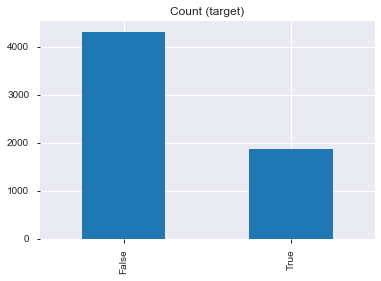

In [136]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.value_counts())

df_test_under.value_counts().plot(kind='bar', title='Count (target)');

Random over-sampling:
True     4899
False    4359
Name: Churn, dtype: int64


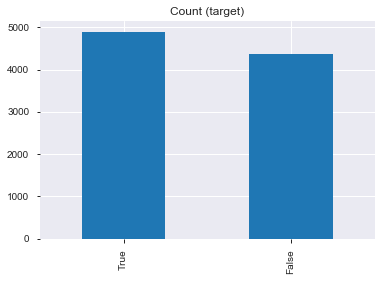

In [137]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.value_counts())

df_test_over.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
Retained_under = Retained.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
df_test_over

In [138]:
y_train = trainy
X_train = df_test_over

### Step 8: Model Building 

#### 1. Logistic regression

In [53]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(trainx,trainy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
lr_train_predictions = logmodel.predict(trainx)
lr_test_predictions = logmodel.predict(vldx)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(vldy,lr_test_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1762
           1       0.20      1.00      0.34       446

    accuracy                           0.20      2208
   macro avg       0.10      0.50      0.17      2208
weighted avg       0.04      0.20      0.07      2208



In [57]:
### Train data accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(trainy,lr_train_predictions))
      
### Test data accuracy
print(accuracy_score(vldy,lr_test_predictions))

0.7420847540185095
0.20199275362318841


In [145]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(vldy,lr_test_predictions)))
print('Precision Score : ' + str(precision_score(vldy,lr_test_predictions)))
print('Recall Score : ' + str(recall_score(vldy,lr_test_predictions)))
print('F1 Score : ' + str(f1_score(vldy,lr_test_predictions)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(vldy,lr_test_predictions)))

Accuracy Score : 0.20199275362318841
Precision Score : 0.20199275362318841
Recall Score : 1.0
F1 Score : 0.3360964581763376
Confusion Matrix : 
[[   0 1762]
 [   0  446]]


#### Logistic Reg. using gridsearch

In [86]:
from sklearn.model_selection import GridSearchCV
logRegGS = LogisticRegression()
grid_values = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
grid_clf_acc = GridSearchCV(logRegGS, param_grid = grid_values,scoring = 'recall')
print("Best Logistic Reg. Param : ",grid_clf_acc)

Best Logistic Reg. Param :  GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 10, 50], 'fit_intercept': [True],
                         'intercept_scaling': [1], 'max_iter': [300, 500],
                         'penalty': ['l2'], 'tol': [0.0001, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring

In [87]:
grid_clf_acc.fit(trainx, trainy)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 10, 50], 'fit_intercept': [True],
                         'intercept_scaling': [1], 'max_iter': [300, 500],
                         'penalty': ['l2'], 'tol': [0.0001, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [88]:
pred_gs = grid_clf_acc.best_estimator_.predict(vldx)

In [89]:
from sklearn.metrics import classification_report
print(classification_report(vldy,pred_gs))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1762
           1       0.20      1.00      0.34       446

    accuracy                           0.20      2208
   macro avg       0.10      0.50      0.17      2208
weighted avg       0.04      0.20      0.07      2208



### SVC

In [58]:
from sklearn.svm import SVC

In [105]:
svc = SVC('C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf'])
print(svc)

SyntaxError: invalid syntax (<ipython-input-105-742fa033082e>, line 1)

In [60]:
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(trainx,trainy)

KeyboardInterrupt: 

In [92]:
#param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
#SVM_grid = GridSearchCV(svc, param_grid, cv=3, refit=True, verbose=0)

In [97]:
#SVM_grid.fit(trainx,trainy)
## Predict
svc_train_predictions = SVM_POL.predict(trainx)
svc_test_predictions = SVM_POL.predict(vldx)

In [98]:
### Train data accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(trainy,svc_train_predictions))
      
### Test data accuracy
print(accuracy_score(vldy,svc_test_predictions))

0.894179249878227
0.20380434782608695


In [133]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(vldy,svc_test_predictions)))
print('Precision Score : ' + str(precision_score(vldy,svc_test_predictions)))
print('Recall Score : ' + str(recall_score(vldy,svc_test_predictions)))
print('F1 Score : ' + str(f1_score(vldy,svc_test_predictions)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(vldy,svc_test_predictions)))

Accuracy Score : 0.20516304347826086
Precision Score : 0.20209376422394174
Recall Score : 0.9955156950672646
F1 Score : 0.33598183881952326
Confusion Matrix : 
[[   9 1753]
 [   2  444]]


In [ ]:
#### Navie Baise

### Decison Tree

In [77]:
param_grid = {"max_depth" : [16,18,20],'max_features':['log2','sqrt']}

dtc_cv_grid = GridSearchCV(estimator = dtc, param_grid = param_grid,
                                        scoring ="neg_mean_squared_error")
dtc_cv_grid.fit(trainx, trainy)
dtc_cv_grid.best_estimator_.fit(trainx, trainy)
pred_train = dtc_cv_grid.best_estimator_.predict(trainx)
pred_val = dtc_cv_grid.best_estimator_.predict(vldx)

In [74]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn import tree

In [67]:
#dtc = DecisionTreeClassifier()
#dtc.fit(trainx,trainy)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [72]:
#pred_train = dtc.predict(trainx)
#pred_vld = dtc.predict(vldx)

In [78]:
print("Accuracy on train is:",accuracy_score(trainy,pred_train))
print("Accuracy on test is:",accuracy_score(vldy,pred_val))

Accuracy on train is: 0.9772284461763273
Accuracy on test is: 0.5778985507246377


In [79]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(vldy,pred_val)))
print('Precision Score : ' + str(precision_score(vldy,pred_val)))
print('Recall Score : ' + str(recall_score(vldy,pred_val)))
print('F1 Score : ' + str(f1_score(vldy,pred_val)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(vldy,pred_val)))

Accuracy Score : 0.5778985507246377
Precision Score : 0.18685567010309279
Recall Score : 0.3251121076233184
F1 Score : 0.23731587561374798
Confusion Matrix : 
[[1131  631]
 [ 301  145]]


In [185]:
dt_pred_val = dtc_cv_grid.best_estimator_.predict(bank_churn_test)

#### Plot Decision tree

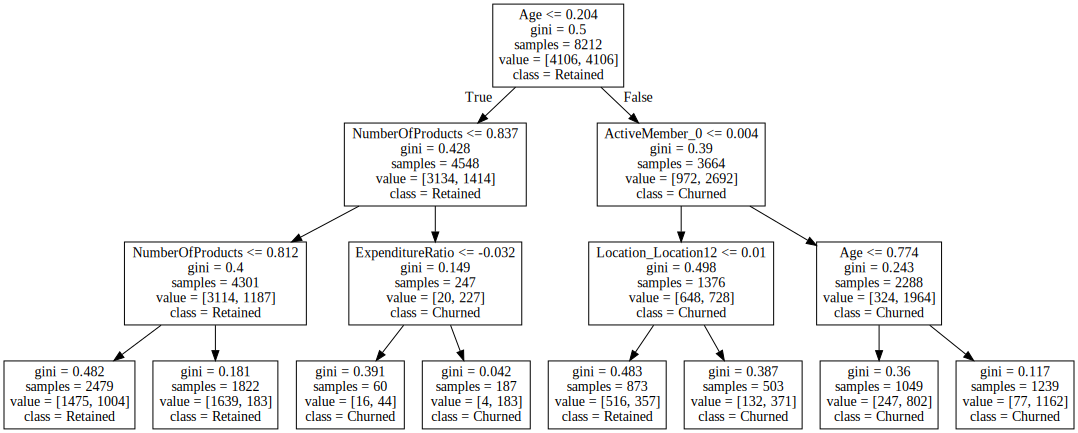

In [104]:

graphviz.Source(export_graphviz(dtc, feature_names=list(vldx.columns),class_names= ['Retained','Churned'] ,out_file=None))

### Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [81]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import make_scorer

## n_jobs = -1 uses all cores of processor
## max_features is the maximum number of attributes to select for each tree
rfc_grid = RandomForestClassifier()
 
# Use a grid over parameters of interest
## n_estimators is the number of trees in the forest
## max_depth is how deep each tree can be
## min_sample_leaf is the minimum samples required in each leaf node for the root node to split
## "A node will only be split if in each of it's leaf nodes there should be min_sample_leaf"

#param_grid = {"n_estimators" : [10, 25],
          # "max_depth" : [10, 12, 14],
          ## "min_samples_leaf" : [ 10, 15, 20],
          # "class_weight" : ['balanced','balanced_subsample']}
 
#rfc_cv_grid = GridSearchCV(estimator = rfc_grid, param_grid = param_grid, cv = 3,
                               # scoring = make_scorer(lambda yt,yp: f1_score(yt,yp,pos_label = 'yes')))
rfc_grid.fit(trainx,trainy)
#rfc_cv_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:

## This line instantiates the model. 
rf = RandomForestClassifier(max_depth = 5) 
## Fit the model on your training data.

#param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
#RanFor_grid = GridSearchCV(rf, param_grid, cv=5, refit=True, verbose=0)
rf.fit(trainx,trainy)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
## And score it on your testing data.

train_pred2 = rf.predict(trainx)
test_pred2= rf.predict(vldx)


In [84]:
print("Accuracy on train is:",accuracy_score(trainy,train_pred2))
print("Accuracy on test is:",accuracy_score(vldy,test_pred2))

Accuracy on train is: 0.8259863614223089
Accuracy on test is: 0.35688405797101447


In [86]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(vldy,test_pred2)))
print('Precision Score : ' + str(precision_score(vldy,test_pred2)))
print('Recall Score : ' + str(recall_score(vldy,test_pred2)))
print('F1 Score : ' + str(f1_score(vldy,test_pred2)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(vldy,test_pred2)))

Accuracy Score : 0.35688405797101447
Precision Score : 0.22423556058890148
Recall Score : 0.8878923766816144
F1 Score : 0.35804701627486435
Confusion Matrix : 
[[ 392 1370]
 [  50  396]]


In [102]:
rf_test_pred= rf.predict(bank_churn_test)

### Gboost

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

In [111]:
GBM_model = GradientBoostingClassifier(n_estimators=20,
                                       learning_rate=0.3,
                                       subsample=0.8)
GBM_model.fit(X=trainx, y=trainy)
pred_train = GBM_model.predict(trainx)
pred_val = GBM_model.predict(vldx)


In [112]:
print("Accuracy on train is:",accuracy_score(trainy,pred_train))
print("Accuracy on test is:",accuracy_score(vldy,pred_val))

Accuracy on train is: 0.8815148563078422
Accuracy on test is: 0.3641304347826087


In [114]:
gb_pred_test = GBM_model.predict(bank_churn_test)

In [113]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(vldy,pred_val)))
print('Precision Score : ' + str(precision_score(vldy,pred_val)))
print('Recall Score : ' + str(recall_score(vldy,pred_val)))
print('F1 Score : ' + str(f1_score(vldy,pred_val)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(vldy,pred_val)))

Accuracy Score : 0.3641304347826087
Precision Score : 0.22628571428571428
Recall Score : 0.8878923766816144
F1 Score : 0.360655737704918
Confusion Matrix : 
[[ 408 1354]
 [  50  396]]


In [110]:
rf_test_pred= rf.predict(bank_churn_test)

In [118]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot

In [119]:
# predict probabilities
probs = rf.predict_proba(trainx)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(vldy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(vldy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
# show the plot
pyplot.show()

NameError: name 'roc_auc_score' is not defined

f1=0.343 auc=0.298 ap=0.299


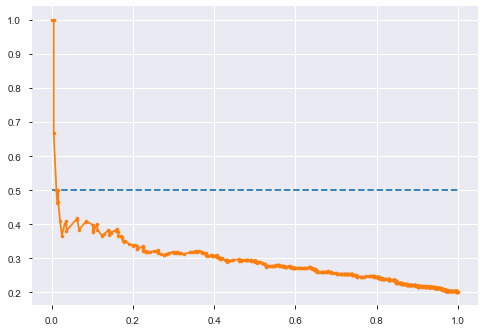

In [98]:
probs = GBM_model.predict_proba(vldx)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = GBM_model.predict(vldx)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(vldy, probs)
# calculate F1 score
f1 = f1_score(vldy, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(vldy, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')

# show the plot
pyplot.show()

#### XGBoost

In [96]:
from xgboost import  XGBClassifier
X_classifier = XGBClassifier()

# Fit Extreme Gradient boosting classifier
#param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
#xgb_grid = GridSearchCV(X_classifier, param_grid, cv=5, refit=True, verbose=0)


X_classifier.fit(trainx,trainy)
xgboost_train_preds=X_classifier.predict(trainx)
xgboost_test_preds=X_classifier.predict(vldx)

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31'] ['AccountBalance', 'Age', 'CreditScore', 'NumberOfProducts', 'Salary', 'Tenure', 'Gender_Female', 'Gender_Male', 'Location_Location11', 'Location_Location12', 'Location_Location13', 'Education_primary', 'Education_secondary', 'Education_tertiary', 'Education_unknown', 'MaritalStatus_divorced', 'MaritalStatus_married', 'MaritalStatus_single', 'Occupation_admin.', 'Occupation_management', 'Occupation_retired', 'Occupation_self-employed', 'Occupation_services', 'Occupation_technician', 'Occupation_unknown', 'Ownhouse_no', 'Ownhouse_unknown', 'Ownhouse_yes', 'IsCreditCardCustomer_0', 'IsCreditCardCustomer_1', 'ActiveMember_0', 'ActiveMember_1']
expected f8, f2, f12, f21, f6, f13, f29, f24, f19, f10, f20, f11, f0, f17, f16, f14, f31, f5, f7, f25, f3, f22, f27, f18, f23, f30, f15, f4, f1, f26, f28, f9 in input data
training data did not have the following fields: Location_Location11, Education_secondary, Salary, AccountBalance, IsCreditCardCustomer_1, CreditScore, Occupation_management, Education_tertiary, MaritalStatus_single, MaritalStatus_divorced, Occupation_admin., Education_unknown, Gender_Male, IsCreditCardCustomer_0, Tenure, Occupation_retired, MaritalStatus_married, Occupation_unknown, ActiveMember_0, Gender_Female, ActiveMember_1, Occupation_technician, Ownhouse_unknown, Age, Occupation_services, Education_primary, Location_Location13, Ownhouse_yes, Location_Location12, Occupation_self-employed, NumberOfProducts, Ownhouse_no

In [ ]:
xgboost_train_preds=X_classifier.predict(trainx)
xgboost_test_preds=X_classifier.predict(vldx)

In [ ]:
#Predicting the train and test set accuracy, precison recall and f1-score
print('Accuracy of XGBoost classifier on train set : ' + str(accuracy_score(trainy,xgboost_train_preds)))
print('Accuracy Score of XGBoost classifier on test set  : ' + str(accuracy_score(valdy,xgboost_test_preds)))
print(" ")
print('Precision Score of XGBoost classifier on train set : ' + str(precision_score(trainy,xgboost_train_preds)))
print('Precision Score of XGBoost classifier on test set : ' + str(precision_score(valdy,xgboost_test_preds)))
print(" ")
print('Recall Score of XGBoost classifier on train set : ' + str(recall_score(trainy,xgboost_train_preds)))
print('Recall Score of XGBoost classifier on test set  : ' + str(recall_score(valdy,xgboost_test_preds)))
print(" ")
print('F1 Score of XGBoost classifier on train set  : ' + str(f1_score(trainy,xgboost_train_preds)))
print('F1 Score of XGBoost classifier on test set : ' + str(f1_score(valdy,xgboost_test_preds)))

### Step 9: ROC / Lerning curve visulizations

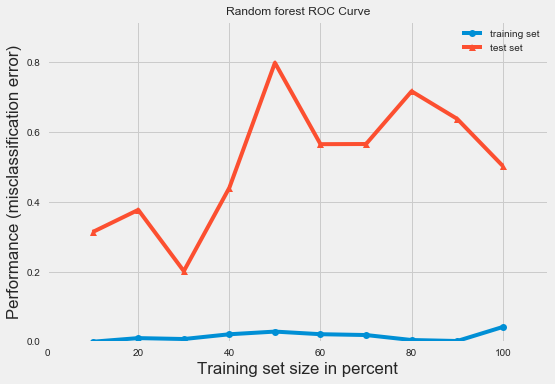

In [123]:
plot_learning_curves(trainx, trainy, vldx, vldy,dtc_cv_grid)
plt.title('Random forest ROC Curve')
plt.show()

In [ ]:
plot_learning_curves(trainx, trainy, vldx, vldy, rf)
plt.title('Random forest ROC Curve')
plt.show()

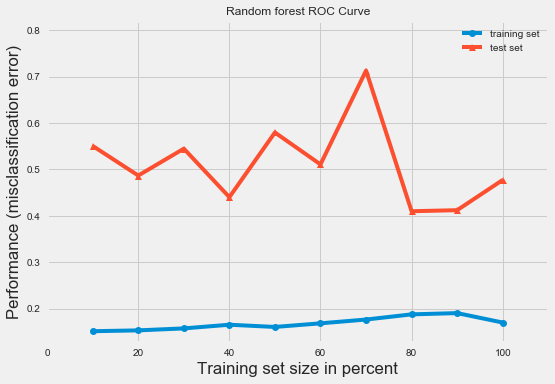

In [122]:
plot_learning_curves(trainx, trainy, vldx, vldy, rf)
plt.title('Random forest ROC Curve')
plt.show()

### Step 10 : Tuning Model (PCA / Feature selection)

### Preparing Test data

In [88]:

bank_churn_test.shape


(1840, 16)

In [89]:
bank_churn_test.dtypes

Gender                  category
Location                category
Education               category
MaritalStatus           category
Occupation              category
Ownhouse                category
CreditScore              float64
AccountBalance           float64
NumberOfProducts         float64
IsCreditCardCustomer    category
ActiveMember            category
Salary                   float64
Age                      float64
Tenure                   float64
ExpenditureRatio         float64
TenureRatio              float64
dtype: object

In [90]:
bank_churn_test

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Age,Tenure,ExpenditureRatio,TenureRatio
0,Male,Location11,primary,divorced,management,no,716.0,0.00,2.0,1,0,189678.70,39.0,5.0,0.000000,0.128205
1,Female,Location13,primary,divorced,admin.,no,568.0,169399.60,1.0,1,0,61936.22,33.0,8.0,2.735065,0.242424
2,Male,Location13,secondary,married,unknown,unknown,739.0,89750.21,1.0,1,0,193008.52,20.0,6.0,0.465006,0.300000
3,Female,Location11,tertiary,married,admin.,yes,678.0,204510.94,1.0,0,1,738.88,50.0,4.0,276.785053,0.080000
4,Male,Location13,tertiary,single,management,no,670.0,0.00,2.0,1,1,78358.94,26.0,7.0,0.000000,0.269231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,Male,Location11,primary,married,technician,yes,536.0,178011.50,2.0,1,0,22375.14,33.0,8.0,7.955771,0.242424
1836,Male,Location11,primary,divorced,unknown,no,557.0,146200.01,1.0,1,0,177944.64,40.0,9.0,0.821604,0.225000
1837,Male,Location12,unknown,single,services,no,747.0,135776.36,3.0,1,0,85470.45,38.0,10.0,1.588577,0.263158
1838,Female,Location11,primary,single,admin.,no,834.0,0.00,1.0,1,0,74287.53,29.0,7.0,0.000000,0.241379


In [91]:
test_num_data = bank_churn_test.loc[:,num_col]
test_cat_data = bank_churn_test.loc[:,cat_col]

In [92]:
standardizer = StandardScaler()
standardizer.fit(test_num_data)
test_num_data = pd.DataFrame(standardizer.transform(test_num_data),columns=num_col)

In [93]:
test_num_data.reset_index(drop=True, inplace=True)
test_cat_data.reset_index(drop=True, inplace=True)

In [94]:
bank_churn_test = pd.concat([test_num_data,test_cat_data],axis=1)

In [95]:
bank_churn_test=pd.get_dummies(bank_churn_test,columns=cat_col.extend(['cat_cc']))

In [97]:
bank_churn_test.drop('cat_cc', axis = 1, inplace = True)

In [98]:
bank_churn_test.head()

,AccountBalance,Age,CreditScore,NumberOfProducts,Salary,Tenure,ExpenditureRatio,TenureRatio,Gender_Female,Gender_Male,...,Occupation_services,Occupation_technician,Occupation_unknown,Ownhouse_no,Ownhouse_unknown,Ownhouse_yes,IsCreditCardCustomer_0,IsCreditCardCustomer_1,ActiveMember_0,ActiveMember_1
0,-1.228994,-0.081272,0.678686,0.799019,1.578071,-0.351396,-0.162828,-0.369353,0,1,...,0,0,0,1,0,0,0,1,1,0
1,1.483021,-0.652039,-0.863175,-0.898666,-0.638972,0.666822,-0.004311,0.885290,1,0,...,0,0,0,1,0,0,0,1,1,0
2,0.207869,-1.888699,0.918300,-0.898666,1.635862,-0.011990,-0.135877,1.517733,0,1,...,0,0,1,0,1,0,0,1,1,0
3,2.045139,0.965133,0.282803,-0.898666,-1.701087,-0.690802,15.878809,-0.898864,1,0,...,0,0,0,0,0,1,1,0,0,1
4,-1.228994,-1.317933,0.199459,0.799019,-0.353947,0.327416,-0.162828,1.179747,0,1,...,0,0,0,1,0,0,0,1,0,1


In [99]:
test_num_data.reset_index(drop=True, inplace=True)

### Step 9 : Submission 

In [115]:
submission = pd.DataFrame({ 'CustomerID': bank_churn_test_sub['CustomerID'],
                            'Churn': gb_pred_test })
submission.to_csv("7th_submission.csv", index=False)

In [116]:
submission.shape

(1840, 2)

### Step 10: Conclusions